<p><center><font size="6"><b>Modelo de Bertalanffy</b></font></center></p>

<hr>
<p><center><font size="4">$N(t)=A*(1-e^{-K*(t-t_0)})$</font></center></p>
<hr>

<div id="justify">
<p><font size="4"><b>Ejemplo de aplicación</b></font></p>
<p><font size="3">Ejemplo 1: La comparación de los modelos de crecimiento y la selección del mejor
modelo que describa muy bien cierto fenómeno de crecimiento, junto con su significado
de dichos parámetros, son tareas importantes en Biología Pesquera, todos éstos aspectos
son útiles para comprender la dinámica del crecimiento en longitud de una población de
peces. A continuación se presentan datos de longitud promedio de un mismo tipo de peces
en relación con la edad:</font></p>
</div>

  |Edad (Años) |Longitud (cm)           
  |------------|-----------------
  |0           |1.89    
  |1           |10.16   
  |2           |16.17     
  |3           |20.53    
  |4           |23.70   
  |5           |26.00         
  |6           |27.67 
  |7           |28.88   
  |8           |29.76
  |9           |30.40
  |10          |30.87 
  |11          |31.20
  |12          |31.45
  |13          |31.63
  |14          |31.76
  |15          |31.85

Interact.Slider{Float64}(9: "input-4" = 30.0 Float64 , L"$A$", 30.0, 0.0:0.1:100.0, "horizontal", true, ".3f", true)

Interact.Slider{Float64}(11: "input-5" = 1.2 Float64 , L"$K$", 1.2, 0.0:0.1:100.0, "horizontal", true, ".3f", true)

Interact.Slider{Float64}(13: "input-6" = 0.3 Float64 , L"$t_0$", 0.3, 0.0:0.1:100.0, "horizontal", true, ".3f", true)


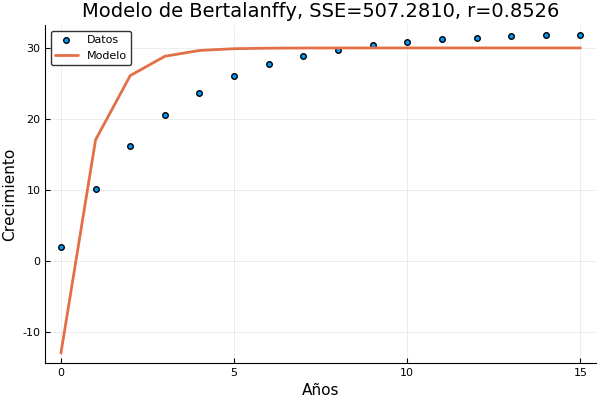

In [3]:
# Carga de paquetes a emplear 
using Reactive, Interact
using LaTeXStrings
using Plots
pyplot()

# Datos experimentales
datos=[0 1.89
    1 10.16
    2 16.17
    3 20.53
    4 23.70
    5 26
    6 27.67
    7 28.88
    8 29.76
    9 30.40
    10 30.87
    11 31.20
    12 31.45
    13 31.63
    14 31.76
    15 31.85]

# Definición de barras deslizadoras interactivas
A_s = slider(0.0:0.1:100.0, value=30.0, label=L"A")
K_s = slider(0.0:0.1:100.0, value=1.2, label=L"K")
t0_s = slider(0.0:0.1:100.0, value=0.3, label=L"t_0")

yAjuste = zeros(length(datos[:,1]))

# Ciclo interactivo
@manipulate for A = A_s, K = K_s, t0 = t0_s
    i = 1
    # Resolver modelo
    for t in datos[:,1]
        # Definición del modelo matemático
        yAjuste[i] = A*(1-exp(-K*(t-t0)))
        i += 1
    end
    
    # SSE (suma de errores al cuadrado)
    SSE = sum((yAjuste - datos[:,2]).^2)
   
    # Gráfica de comparación entre datos experimentales y modelo
    G1= scatter(datos[:,1], datos[:,2], label="Datos")
    msg = @sprintf("Modelo de Bertalanffy, SSE=%4.4f, r=%4.4f", SSE,cor(yAjuste,datos[:,2]))
    plot!(datos[:,1], yAjuste, label="Modelo", lw=2, xlabel="Años", ylabel = "Crecimiento", title=msg)
end


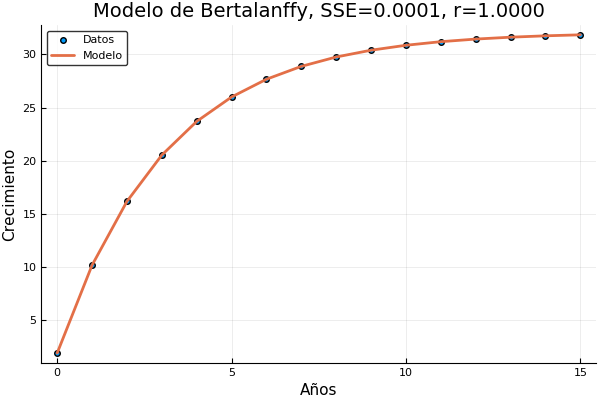

A = 32.0992
K = 0.3200
t0 = -0.1896
SSE = 0.0001
r = 1.0000

In [2]:
# Carga de paquetes a emplear 
using LaTeXStrings
using Plots
using LsqFit
pyplot()

# Datos experimentales
datos=[0 1.89
    1 10.16
    2 16.17
    3 20.53
    4 23.70
    5 26
    6 27.67
    7 28.88
    8 29.76
    9 30.40
    10 30.87
    11 31.20
    12 31.45
    13 31.63
    14 31.76
    15 31.85]

# Definición del modelo matemático
model(t, P) = P[1]*(1-exp.(-P[2]*(t-P[3])))

# Vector de valores iniciales
p0 = [31, 2, 0.5]

# Uso de la funcion curve_fit para ajustar el modelo a los datos experimentales
fit = curve_fit(model, datos[:,1], datos[:,2], p0)
# fit is a composite type (LsqFitResult), with some interesting values:
#	fit.dof: degrees of freedom
#	fit.param: best fit parameters
#	fit.resid: residuals = vector of residuals
#	fit.jacobian: estimated Jacobian at solution

# Obtención de datos calculados
yAjuste = model(datos[:,1], fit.param)

# Gráfica de comparación entre datos experimentales y modelo
pl = scatter(datos[:,1], datos[:,2], label="Datos")
msg = @sprintf("Modelo de Bertalanffy, SSE=%4.4f, r=%4.4f", sum(fit.resid.^2),cor(yAjuste,datos[:,2]))
plot!(datos[:,1], yAjuste, label="Modelo", lw=2, xlabel="Años", ylabel = "Crecimiento", title=msg)
display(pl)

# Impresión de resultados númericos
print_with_color(:bold,@sprintf("A = %4.4f\n",fit.param[1]))
print_with_color(:bold,@sprintf("K = %4.4f\n",fit.param[2]))
print_with_color(:bold,@sprintf("t0 = %4.4f\n",fit.param[3]))
print_with_color(:bold,@sprintf("SSE = %4.4f\n",sum(fit.resid.^2)))
print_with_color(:bold,@sprintf("r = %4.4f",cor(yAjuste,datos[:,2])))